# Capstone Project - The Battle of Neighborhoods
## 1. Introduction
Below is the brief discussion of the project that I want to conduct

The Cafe House company wants to expand their business and open more cafe shop in Ho Chi Minh city within the chain. THe business stakeholder wants know **Which location you will recommend in Ho Chi Minh city to open a cafe** in order to attract as many customers as possible. 

An understanding of existing location will help making the decision and after discussion with the management team, strategic planning, data scientist teams came out with the following hypothesis of the popular cafe shop location.
* Places surrounded by shopping street, cinema, entertainment spots.
* Near big road, does not locate in small roads

Then, after analyzing the current shop location data, I will maek recommendation on the next potential location for a new cafe shop.

## 2. Data 
1. Use the list of chain store taken from the website
2. Use Foursquare data to explore the surrounding area characteristics

In [110]:
import pandas as pd
import numpy as np
import json # library to handle JSON files


import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt

In [11]:
# Load the data list of store
store = pd.read_csv('D:/Database NFL/Coffee_house.csv')
store

,Address,Latitude,Longitude
0,159 Pham Ngu Lao,10.768944,106.694432
1,141 Nguyen Thai Binh,10.768249,106.698897
2,47-49 Le Thi Rieng,10.771258,106.691517
3,180 Tran Quang Khai,10.791873,106.689762
4,572 Ba Thang Hai,10.766510,106.664095
5,798 Su Van Hanh,10.774309,106.668464
6,175B Cao Thang,10.775067,106.675587
7,25A Dong Nai,10.780824,106.661750
8,359 Do Xuan Hop,10.821463,106.772440
9,"Lo T2-1.2, D1",10.851567,106.797499


To explore the surrounding facilities of each location, I use the FourSquare API

In [13]:
# define Foursquare Credentials and Version
CLIENT_ID = 'LM2QESNXA3LD2SWAQWW4ODK2KAXEMTIGNU5CQ0WK4VQKHHVN' # your Foursquare ID
CLIENT_SECRET = '1KGIHAR0GPAHDBOORGAQ11DGIKUFFRVYB05F4I1KFWBH4T1K' # your Foursquare Secret
VERSION = '20191229' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LM2QESNXA3LD2SWAQWW4ODK2KAXEMTIGNU5CQ0WK4VQKHHVN
CLIENT_SECRET:1KGIHAR0GPAHDBOORGAQ11DGIKUFFRVYB05F4I1KFWBH4T1K


In [88]:
# Get the top 10 venues that are within a radius of 500 meters.
radius = 500
LIMIT = 20

venues = []

for lat, long, neighborhood in zip(store['Latitude'], store['Longitude'], store['Address']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
      
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [89]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Address', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(171, 7)


,Address,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,159 Pham Ngu Lao,10.768944,106.694432,Saigon Ink Tattoo,10.767279,106.694758,Tattoo Parlor
1,159 Pham Ngu Lao,10.768944,106.694432,Asiana Food Town @ The Sense Market,10.769282,106.693399,Food Court
2,159 Pham Ngu Lao,10.768944,106.694432,Five Boy Number One,10.767148,106.693257,Juice Bar
3,159 Pham Ngu Lao,10.768944,106.694432,New World Saigon Hotel,10.770545,106.695183,Hotel
4,159 Pham Ngu Lao,10.768944,106.694432,Beautiful Spa,10.767098,106.693534,Massage Studio


## 3. Exploratory analysis

**Number of Venue associated with each location:**

After retrieving the list of surrounding locations. I will see how many locations were returned for each address

In [97]:
b=venues_df.groupby(["Address"]).count()
b=b.iloc[:,0:1]
#b=b.columns=[['Latitute', 'Number of venues']]
b

,Latitude
Address,
141 Nguyen Thai Binh,20
159 Pham Ngu Lao,20
175B Cao Thang,20
180 Tran Quang Khai,20
25A Dong Nai,18
313 Nguyen Thi Thap,6
359 Do Xuan Hop,6
400A Huynh Tan Phat,3
47-49 Le Thi Rieng,20


**List of category**

Let's see what kind of Venue categories we have in the database

In [108]:
venues_df['VenueCategory'].unique()[:50]

array(['Tattoo Parlor', 'Food Court', 'Juice Bar', 'Hotel',
       'Massage Studio', 'Whisky Bar', 'Japanese Restaurant',
       'Sandwich Place', 'Food Truck', 'Bar', 'Vietnamese Restaurant',
       'Shoe Store', 'Coffee Shop', 'Mexican Restaurant',
       'Japanese Curry Restaurant', 'Indian Restaurant', 'Dessert Shop',
       'Burger Joint', 'Tapas Restaurant', 'Bistro', 'Ice Cream Shop',
       'Hostel', 'Beer Bar', 'Spa', 'Nightclub', 'Korean Restaurant',
       'BBQ Joint', 'Sushi Restaurant', 'Cocktail Bar', 'Park', 'Café',
       'Vegetarian / Vegan Restaurant', 'Yoga Studio', 'Design Studio',
       'Breakfast Spot', 'Asian Restaurant', 'Snack Place', 'Market',
       'Frozen Yogurt Shop', 'Fast Food Restaurant', 'Chinese Restaurant',
       'Mobile Phone Shop', 'Multiplex', 'Steakhouse', 'Bookstore',
       'Hospital', 'Seafood Restaurant', 'Bubble Tea Shop', 'Music Venue',
       'Gym / Fitness Center'], dtype=object)

In [99]:
# one hot encoding
onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['Address'] = venues_df['Address'] 
a = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[a]
onehot.head()

,Address,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,...,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tennis Court,Theater,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Yoga Studio
0,159 Pham Ngu Lao,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,159 Pham Ngu Lao,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,159 Pham Ngu Lao,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,159 Pham Ngu Lao,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,159 Pham Ngu Lao,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Which venue cateogry appears the most in the dataset**

To count the frequency of each category appeared in the dataset, I wil generate the mena of each category for each store address

In [100]:
a=onehot.sum().reset_index()
a.columns=['category','count']
a=a.iloc[1:,:]
a=a.sort_values(by='count', ascending=False).reset_index()
a=a.iloc[:,1:]
a.head(15)

,category,count
0,Vietnamese Restaurant,32
1,Café,24
2,Coffee Shop,11
3,Asian Restaurant,6
4,Hotel,6
5,Sandwich Place,5
6,BBQ Joint,4
7,Dessert Shop,4
8,Spa,3
9,Vegetarian / Vegan Restaurant,3


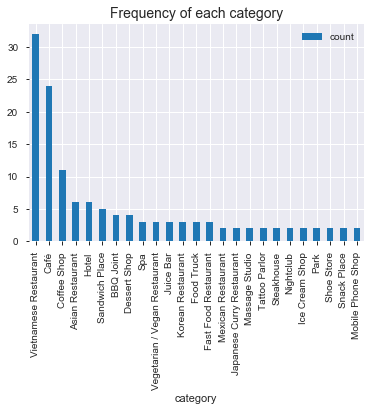

In [116]:
# Plot the result
a1=a.head(25)
a1.plot.bar(x='category',y='count')
plt.title('Frequency of each category',fontsize = 14)
plt.show()

In [109]:
venues_df.groupby('Address').VenueCategory.agg([('VenueCategory', ', '.join)]).reset_index()

,Address,VenueCategory
0,141 Nguyen Thai Binh,"Dessert Shop, Vietnamese Restaurant, Vietnames..."
1,159 Pham Ngu Lao,"Tattoo Parlor, Food Court, Juice Bar, Hotel, M..."
2,175B Cao Thang,"Vietnamese Restaurant, Vietnamese Restaurant, ..."
3,180 Tran Quang Khai,"Vietnamese Restaurant, Vietnamese Restaurant, ..."
4,25A Dong Nai,"Vietnamese Restaurant, Vietnamese Restaurant, ..."
5,313 Nguyen Thi Thap,"Café, Coffee Shop, Steakhouse, Flea Market, Fl..."
6,359 Do Xuan Hop,"Coffee Shop, BBQ Joint, Fast Food Restaurant, ..."
7,400A Huynh Tan Phat,"Café, Pizza Place, Vietnamese Restaurant"
8,47-49 Le Thi Rieng,"Sandwich Place, Vietnamese Restaurant, Food Tr..."
9,572 Ba Thang Hai,"Café, BBQ Joint, Coffee Shop, Vietnamese Resta..."


Most of the surrounding facilities belong to restaurants, coffee shop and cafe catogories, which include Vietnamese restaurant, Cafe/Coffee shop, Sandwich, Vegetarian Restaurant
In each branch, there is at least 1 cafe/coffee shop or Vietnamese restaurant